# Exploratory Data Analysis


Basic statistics and individual plots are generated using pandas-profiling package in html files outside this notebook.  
Relations betweeen numerical and categorical variables are visualized using seaborn within this notebook.

In [1]:
import geopandas as gpd
import matplotlib as plt
import pandas as pd
import seaborn as sns
import pandas_profiling
import mplleaflet as leaflet
from matplotlib.ticker import PercentFormatter
import matplotlib.pyplot as plt

In [2]:
all_data = gpd.read_file('outputs/newvars_surveys.geojson')

In [3]:
all_data.columns

Index(['latitude', 'longitude', 'venta_frutas', 'venta_verduras',
       'superficie_bodega', 'num_personas', 'hora_apertura_semana',
       'hora_cierre_semana', 'abre_fin_de_semana', 'horario_atencion_igual',
       'hora_apertura_fin_de_semana', 'hora_cierre_fin_de_semana',
       'num_entregas_general', 'num_recojos_general', 'num_lugares',
       'num_entregas_fv', 'num_recojos_fv', 'lugar_principal',
       'vehiculo_recojo', 'vehiculo_recojo_other',
       'num_viajes_lugar_principal', 'cant_carga', 'cant_sku', 'cadena_frio',
       'cant_merma', 'motivo_si_oferta', 'motivo_si_oferta_other',
       'motivo_no_oferta', 'motivo_no_oferta_other', 'gps_altitude',
       'ventaFyV', 'in_food_desert', 'distrito', 'distance_to_market',
       'dist_2closest_mkt', 'NSE07', 'index_right', 'population',
       'betweenness_centrality_avg', 'kopt+0_Clusters', 'geometry'],
      dtype='object')



## Generate data profiles

In [4]:
all_data_profile = pandas_profiling.ProfileReport(df=all_data)

AttributeError: 'GeometryArray' object has no attribute 'value_counts'

In [ ]:
all_data_profile.to_file(output_file="outputs/data_profile.html")

In [16]:
# Show variables sorted by dtype
all_data.dtypes

latitude                        float64
longitude                       float64
venta_frutas                    float64
venta_verduras                  float64
superficie_bodega               float64
num_personas                    float64
hora_apertura_semana             object
hora_cierre_semana               object
abre_fin_de_semana               object
horario_atencion_igual           object
hora_apertura_fin_de_semana      object
hora_cierre_fin_de_semana        object
num_entregas_general            float64
num_recojos_general             float64
num_lugares                     float64
num_entregas_fv                 float64
num_recojos_fv                  float64
lugar_principal                  object
vehiculo_recojo                  object
vehiculo_recojo_other            object
num_viajes_lugar_principal      float64
cant_carga                      float64
cant_sku                        float64
cadena_frio                     float64
cant_merma                      float64


In [17]:
all_data.drop(['index_right'], axis=1, inplace=True)

KeyError: "['index_right'] not found in axis"

In [18]:
# Create list of categorial and numerical variables
catvars = all_data.select_dtypes(include=['object','bool']).columns
numvars = all_data.select_dtypes(include=['int64','float64']).columns

## Generate visualizations

In [27]:
all_data[['hora_apertura_semana (hour)','hora_apertura_semana (minute)', 'hora_apertura_semana (seconds)']] = all_data.hora_apertura_semana.str.split(':', expand=True).astype(float)
all_data[['hora_cierre_semana (hour)','hora_cierre_semana (minute)','hora_cierre_semana (seconds)']] = all_data.hora_cierre_semana.str.split(':', expand=True).astype(float)
all_data[['hora_apertura_fin_de_semana (hour)','hora_apertura_fin_de_semana (minute)','hora_apertura_fin_de_semana (seconds)']] = all_data.hora_apertura_fin_de_semana.str.split(':', expand=True).astype(float)
all_data[['hora_cierre_fin_de_semana (hour)','hora_cierre_fin_de_semana (minute)','hora_cierre_fin_de_semana (seconds)']] = all_data.hora_cierre_fin_de_semana.str.split(':', expand=True).astype(float)

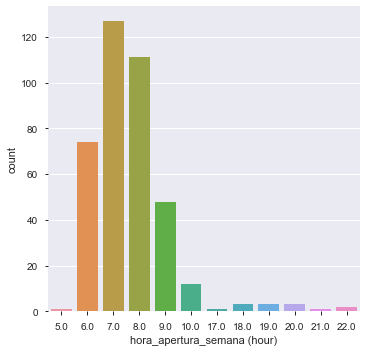

In [9]:
g = sns.catplot(x='hora_apertura_semana (hour)', kind="count", data=all_data)

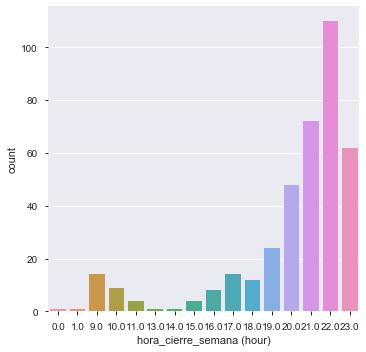

In [10]:
g = sns.catplot(x='hora_cierre_semana (hour)', kind="count", data=all_data)

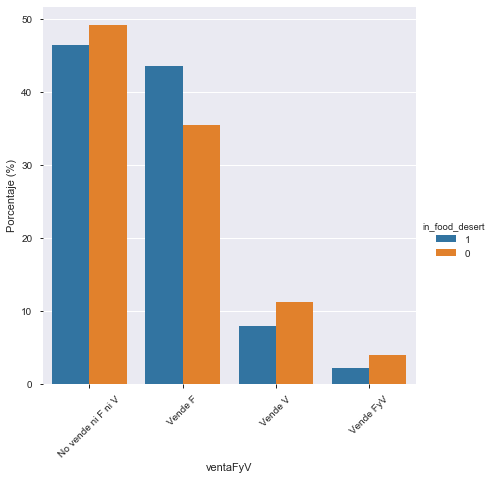

In [11]:
x, y, hue = "ventaFyV", "prop", "in_food_desert"
VyFlabels = ['No vende ni F ni V','Vende F','Vende V','Vende FyV']
hue_order = [1, 0]

prop_df = (all_data[x]
           .groupby(all_data[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

prop_df['Porcentaje (%)'] = prop_df['prop']*100

g = sns.catplot(x=x, y="Porcentaje (%)", hue=hue, data=prop_df, kind='bar',
                hue_order=hue_order, height=6)

g.set_xticklabels(labels=VyFlabels, rotation=45);

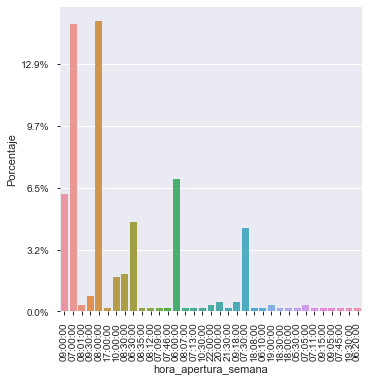

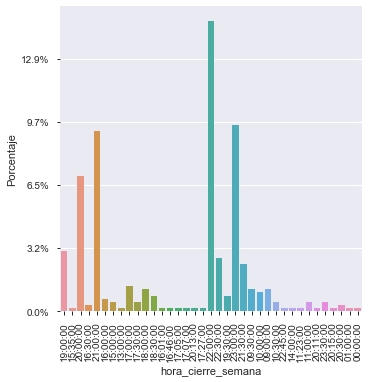

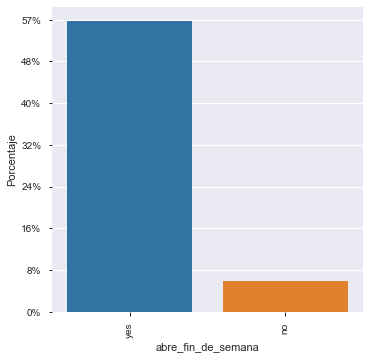

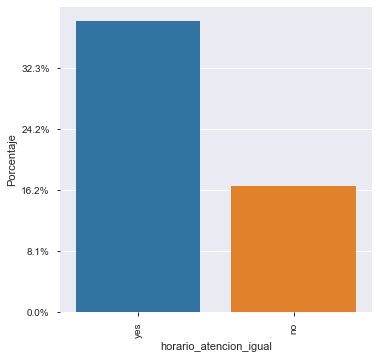

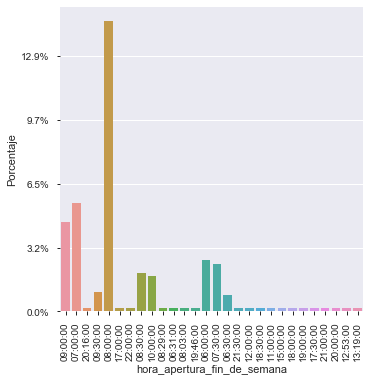

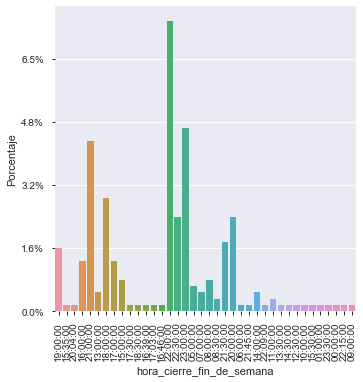

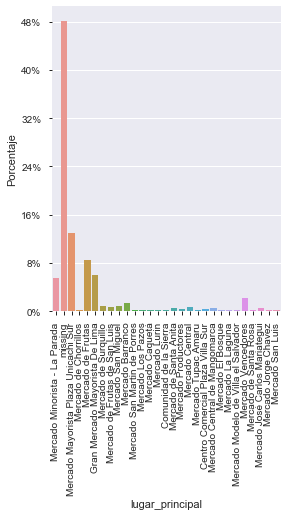

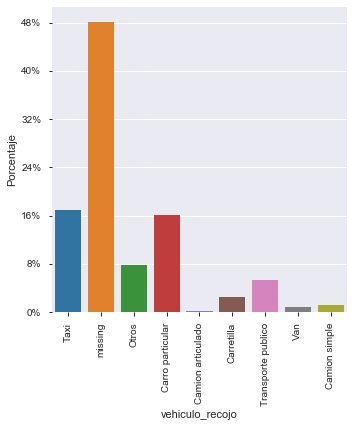

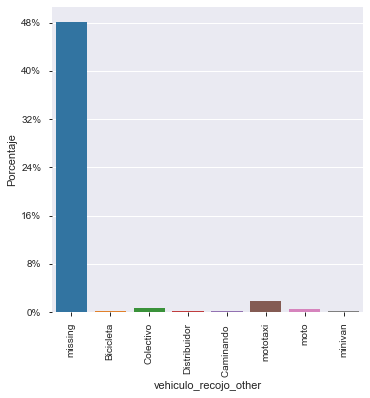

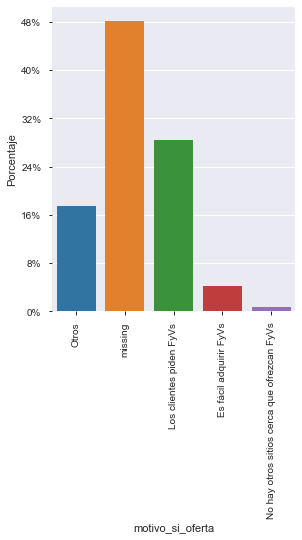

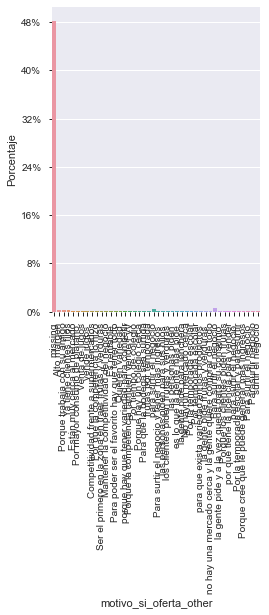

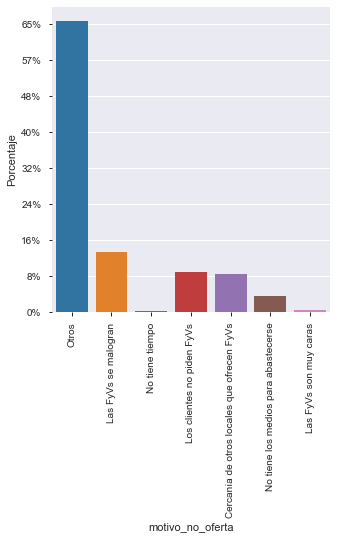

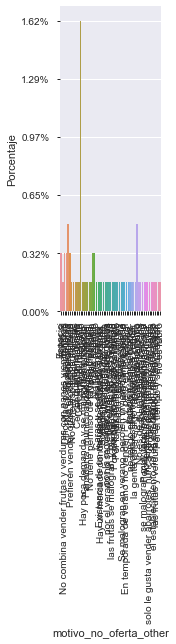

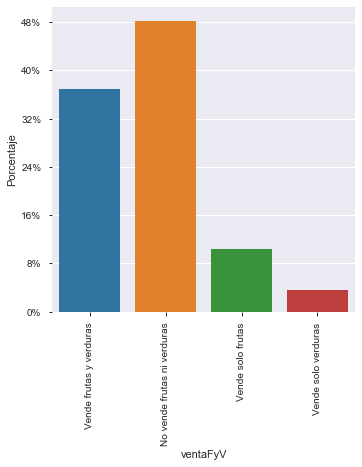

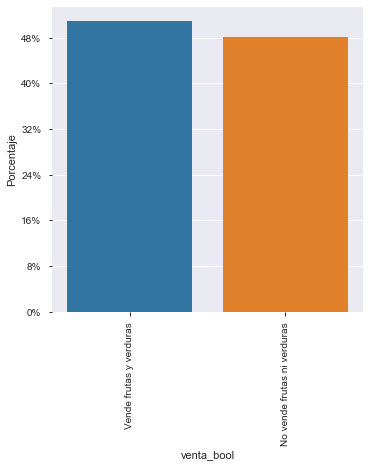

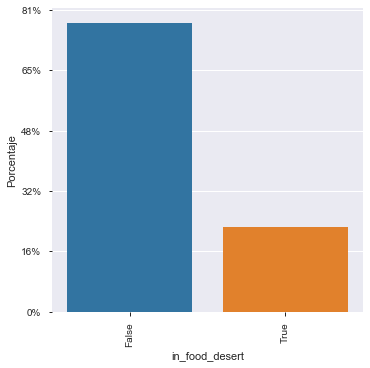

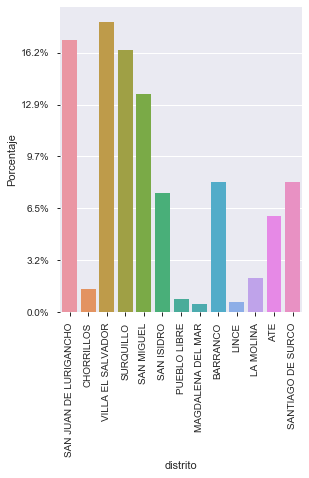

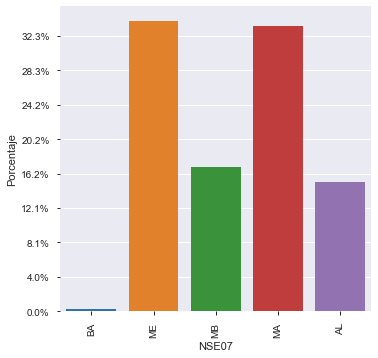

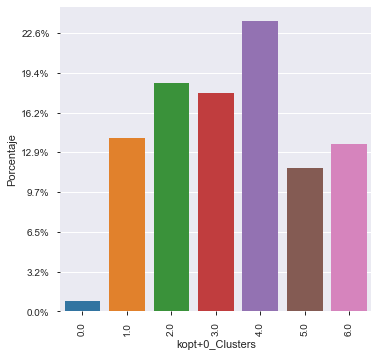

In [12]:
for var in catvars:
    if var != 'geometry':
        g = sns.catplot(x=var, kind="count", data=all_data)
        g.set_xticklabels(rotation=90)
        g.set_axis_labels(var, "Porcentaje")
    for ax in g.axes.flat:
        ax.yaxis.set_major_formatter(
            PercentFormatter(all_data.shape[0])
        )

In [13]:
all_data[x].groupby(all_data[hue]).value_counts(normalize=True)

in_food_desert  ventaFyV                   
False           No vende frutas ni verduras    0.492693
                Vende frutas y verduras        0.354906
                Vende solo frutas              0.112735
                Vende solo verduras            0.039666
True            No vende frutas ni verduras    0.464286
                Vende frutas y verduras        0.435714
                Vende solo frutas              0.078571
                Vende solo verduras            0.021429
Name: ventaFyV, dtype: float64

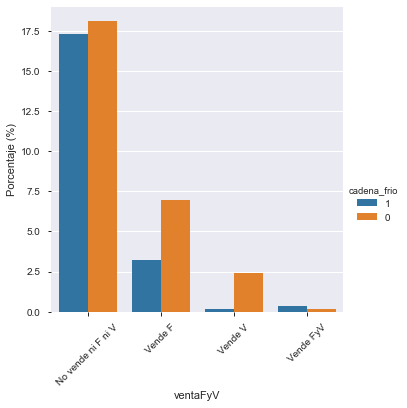

In [14]:
x, y, hue = "ventaFyV", "prop", "cadena_frio"
hue_order = [1, 0]

prop_df = (all_data[x]
           .groupby(all_data[hue])
           .value_counts()
           .rename(y)
           .reset_index())

prop_df['Porcentaje (%)'] = prop_df['prop']/all_data.shape[0]*100

g = sns.catplot(x=x, y='Porcentaje (%)', hue=hue, kind='bar',
                data=prop_df, hue_order=hue_order)
g.set_xticklabels(labels=VyFlabels, rotation=45);

In [15]:
all_data.columns

Index(['latitude', 'longitude', 'venta_frutas', 'venta_verduras',
       'superficie_bodega', 'num_personas', 'hora_apertura_semana',
       'hora_cierre_semana', 'abre_fin_de_semana', 'horario_atencion_igual',
       'hora_apertura_fin_de_semana', 'hora_cierre_fin_de_semana',
       'num_entregas_general', 'num_recojos_general', 'num_lugares',
       'num_entregas_fv', 'num_recojos_fv', 'lugar_principal',
       'vehiculo_recojo', 'vehiculo_recojo_other',
       'num_viajes_lugar_principal', 'cant_carga', 'cant_sku', 'cadena_frio',
       'cant_merma', 'motivo_si_oferta', 'motivo_si_oferta_other',
       'motivo_no_oferta', 'motivo_no_oferta_other', 'gps_altitude',
       'ventaFyV', 'venta_bool', 'atencion_semana', 'atencion_fin_de_semana',
       'in_food_desert', 'distrito', 'distance_to_market', 'dist_2closest_mkt',
       'NSE07', 'population', 'betweenness_centrality_avg', 'kopt+0_Clusters',
       'geometry', 'hora_apertura_semana (hour)',
       'hora_apertura_semana (minute)'

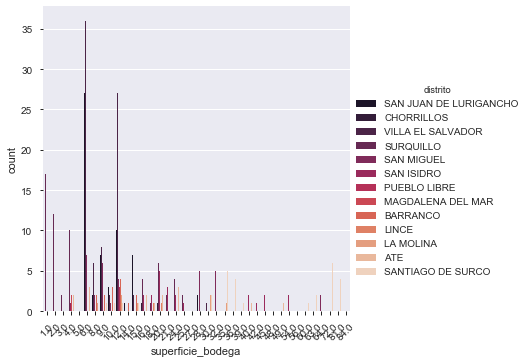

In [16]:
ax = sns.catplot(x="superficie_bodega", hue="distrito", kind="count",
                 data=all_data, palette="rocket",
                 )
ax.set_xticklabels(rotation=45);

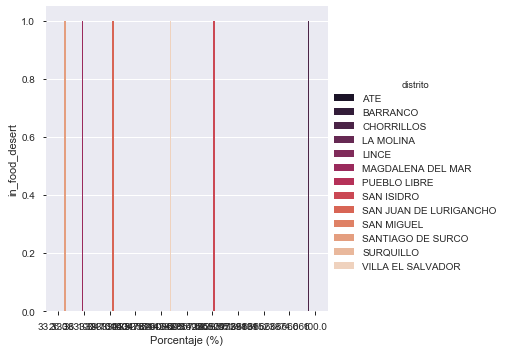

In [17]:
x, y, hue = "prop", "in_food_desert", "distrito"

prop_df = (all_data[y]
           .groupby(all_data[hue])
           .value_counts(normalize=True)
           .rename(x)
           .reset_index())

prop_df['Porcentaje (%)'] = prop_df['prop']*100

sns.catplot(x="Porcentaje (%)", y=y, hue=hue, kind="bar",
            palette="rocket", data=prop_df);

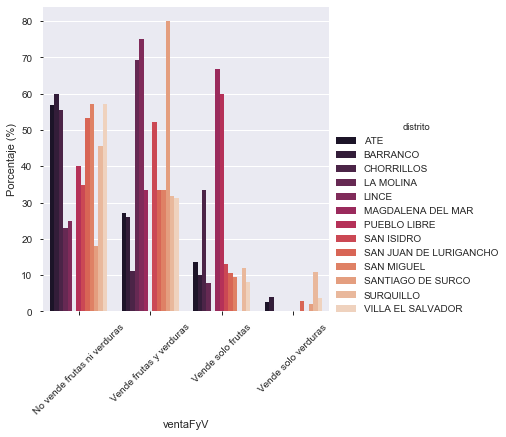

In [18]:
x, y, hue = "ventaFyV", "prop", "distrito"

prop_df = (all_data[x]
           .groupby(all_data[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

prop_df['Porcentaje (%)'] = prop_df['prop']*100

g = sns.catplot(x=x, y="Porcentaje (%)", hue=hue, kind="bar",
                palette="rocket", data=prop_df);
g.set_xticklabels(rotation=45);

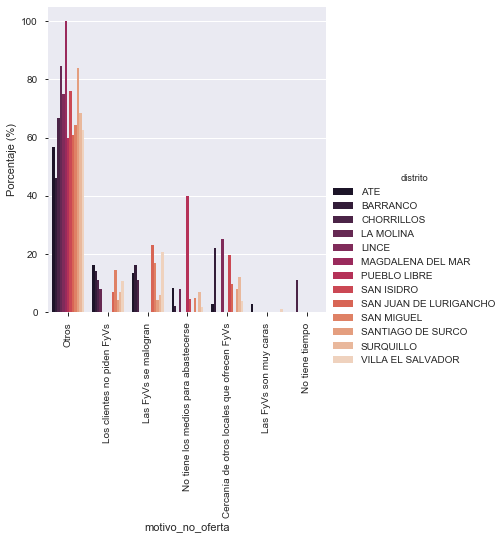

In [19]:
x, y, hue = "motivo_no_oferta", "prop", "distrito"

prop_df = (all_data[x]
           .groupby(all_data[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

prop_df['Porcentaje (%)'] = prop_df['prop']*100

g = sns.catplot(x=x, y="Porcentaje (%)", hue=hue, kind="bar",
                palette="rocket", data=prop_df);
g.set_xticklabels(rotation=90);

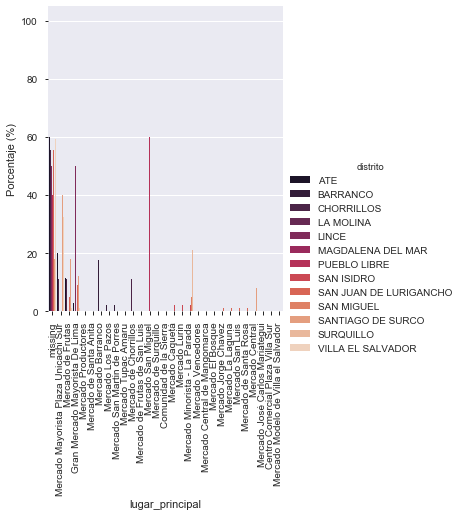

In [20]:
x, y, hue = "lugar_principal", "prop", "distrito"

prop_df = (all_data[x]
           .groupby(all_data[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

prop_df['Porcentaje (%)'] = prop_df['prop']*100

g = sns.catplot(x=x, y="Porcentaje (%)", hue=hue, kind="bar",
                palette="rocket", data=prop_df);
g.set_xticklabels(rotation=90);

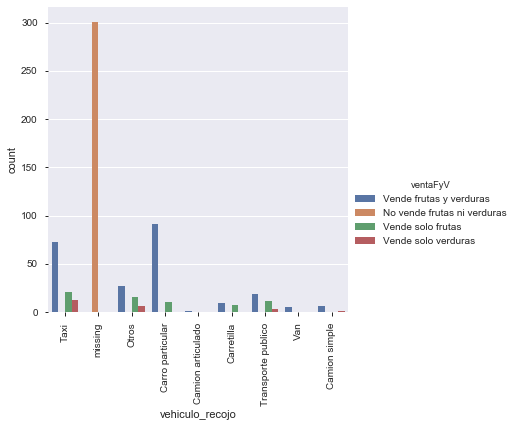

In [21]:
g = sns.catplot(x="vehiculo_recojo", hue="ventaFyV", kind="count",
                data=all_data, palette="deep",
                hue_order=all_data["ventaFyV"].unique());
g.set_xticklabels(rotation=90);

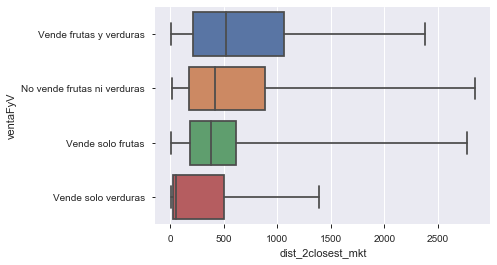

In [22]:
g = sns.boxplot(x='dist_2closest_mkt', y="ventaFyV", data=all_data,
                whis="range", palette="deep", order=all_data["ventaFyV"].unique())

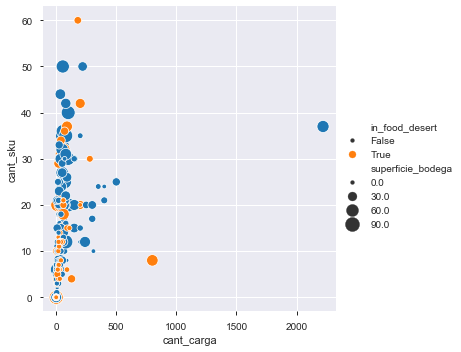

In [23]:
sns.relplot(x="cant_carga", y="cant_sku", size='superficie_bodega', sizes=(15, 200),
            hue='in_food_desert', data=all_data);

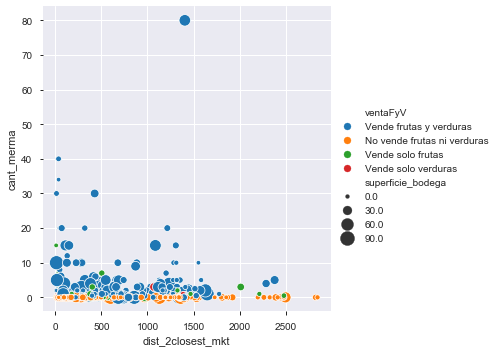

In [24]:
sns.relplot(x='dist_2closest_mkt', y="cant_merma", size='superficie_bodega', sizes=(15, 200), hue='ventaFyV', data=all_data);

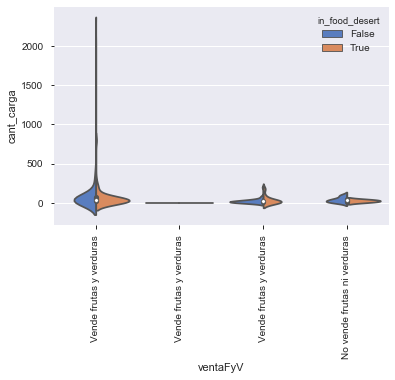

In [25]:
ax = sns.violinplot(x="ventaFyV", y="cant_carga", hue="in_food_desert",
                    data=all_data, palette="muted",
                    split=True)
ax.set_xticklabels(labels=all_data["ventaFyV"], rotation=90);

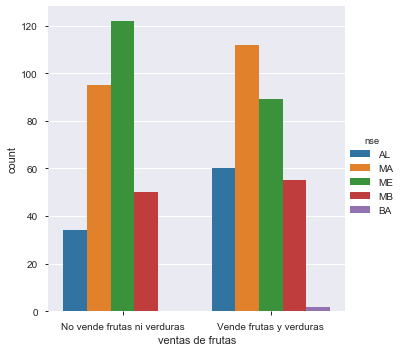

In [37]:
# group data by venta and nse
df_grouped_venta_nse = all_data.groupby(by=['venta_bool', 'NSE07']).count().iloc[:,[0]].reset_index()
df_grouped_venta_nse.columns = ['ventas de frutas', 'nse', 'count']

# plot 
sns.catplot(x="ventas de frutas", y="count", hue="nse",
            hue_order=["AL", "MA", "ME", "MB", "BA"], kind="bar",
            data=df_grouped_venta_nse);

In [42]:
# grouped data by venta and distrito
df_grouped_venta_distrito = all_data.groupby(['venta_bool', 'distrito']).count().iloc[:,0].reset_index()
df_grouped_venta_distrito.columns = ['venta_bool', 'distrito', 'nanostore_count']

# get total nanostores and proportion
df_venta_distrito = df_grouped_venta_distrito[df_grouped_venta_distrito['venta_bool'] == 'Vende frutas y verduras']
df_venta_distrito.loc[:,'nanostore_total'] = all_data.groupby(by=['distrito']).count().iloc[:,0].values
df_venta_distrito.loc[:,'nanostore_prop'] = df_venta_distrito['nanostore_count'] / df_venta_distrito['nanostore_total']

# get geometry from shapefile
distritos = gpd.read_file('inputs/lima_region_metropolitana/lima_metropolitana.shp')
df_venta_distrito_geo = pd.merge(df_venta_distrito, distritos, how='left', on='distrito', suffixes=(None, None))

df_venta_distrito_geo = gpd.GeoDataFrame(df_venta_distrito_geo.iloc[:,:-1], crs=distritos.crs, geometry=df_venta_distrito_geo.iloc[:,-1])

df_venta_distrito_geo.loc[:,'nanostore_count'] = df_venta_distrito_geo['nanostore_count'].fillna(0)
df_venta_distrito_geo.loc[:,'nanostore_prop'] = df_venta_distrito_geo['nanostore_prop'].fillna(0)

# drop districts with less than 30 obs
df_venta_distrito_geo = df_venta_distrito_geo[df_venta_distrito_geo['nanostore_count'] >= 30]

# maps

In [76]:
import folium

In [86]:
df_venta_distrito_geo.

TypeError: to_file() missing 1 required positional argument: 'filename'

In [160]:
df_venta_distrito_geo.plot(cmap="viridis", column="nanostore_count", ax=ax, alpha=1, figsize=(10,10));
leaflet.display(fig=fig)

<Figure size 432x288 with 0 Axes>

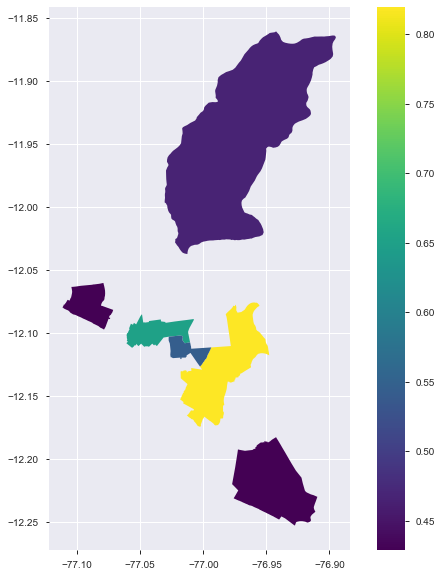

In [179]:
df_venta_distrito_geo.plot(cmap="viridis", column="nanostore_prop", figsize=(10,10), legend=True)

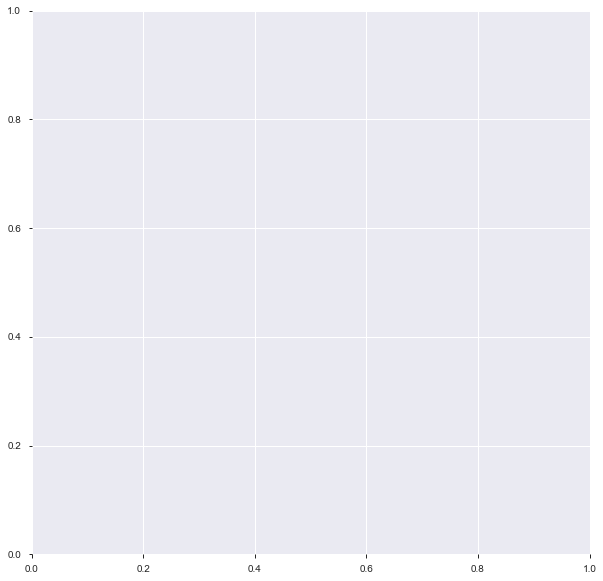

In [167]:
fig, ax = plt.subplots(figsize=(10,10))

In [170]:
df_venta_distrito_geo.plot(cmap="viridis", column="nanostore_prop", ax=ax)
leaflet.display(fig=fig)

<Figure size 432x288 with 0 Axes>